In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import datetime

In [2]:
X = np.load('X_metrics.npy')
y = np.load('y_metrics.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [3]:
actions = np.array(['Alerta de Caída',
                        'Normal',
                        'Normal2',
                        'Sentándose',
                        'Levantándose',
                        'Sentado',
                        'Caminando'])

In [4]:
from tensorflow.keras.layers import Dropout,BatchNormalization, Flatten, Conv1D, MaxPooling1D

In [6]:
def SYSU(action):
    input_shape = (X_train.shape[1], X_train.shape[2])
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = LSTM(100, return_sequences=True, activation='tanh')(input_layer)
    x = Dropout(0.5)(x)
    x = LSTM(100, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.5)(x)
    x = LSTM(100, return_sequences=False, activation='tanh')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(action), activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model



In [7]:
ModelSYSU = SYSU(actions)
ModelSYSU.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 132)]         0         
                                                                 
 lstm (LSTM)                 (None, 30, 100)           93200     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0     

In [8]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)

# Create an optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [9]:
ModelSYSU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 30,  restore_best_weights = True)

In [11]:
history = ModelSYSU.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/2000
6/6 [==============================] - 13s 633ms/step - loss: 1.9538 - categorical_accuracy: 0.1385 - val_loss: 1.9138 - val_categorical_accuracy: 0.1951
Epoch 2/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.9208 - categorical_accuracy: 0.2123 - val_loss: 1.9040 - val_categorical_accuracy: 0.2073
Epoch 3/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.8729 - categorical_accuracy: 0.2400 - val_loss: 1.7674 - val_categorical_accuracy: 0.3537
Epoch 4/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.7095 - categorical_accuracy: 0.3662 - val_loss: 1.6649 - val_categorical_accuracy: 0.3902
Epoch 5/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.5208 - categorical_accuracy: 0.4338 - val_loss: 1.5432 - val_categorical_accuracy: 0.3537
Epoch 6/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.4213 - categorical_accuracy: 0.4308 - val_loss: 1.5360 - val_categorical_accuracy: 0.3780
Epo

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


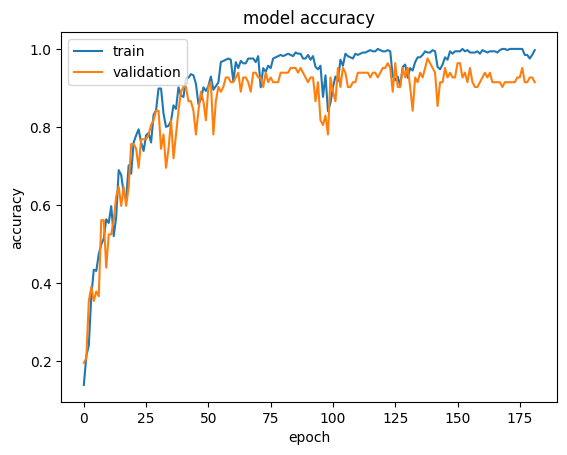

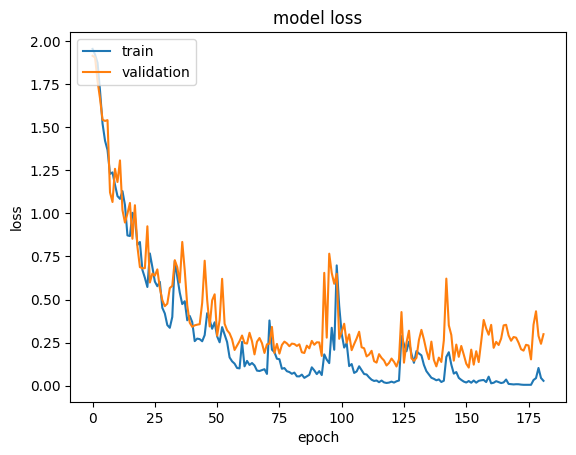

In [12]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
res = ModelSYSU.predict(X_test)

3/3 [==============================] - 2s 24ms/step


In [14]:
import numpy as np

def threshold_vector(vector, threshold=0.5):
    return np.where(vector >= threshold, 1, 0)

binary_vector = threshold_vector(res)
binary_vector

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0,

In [15]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
pred = []
test = []
for i in res:
  pred.append(np.argmax(i))
for i in y_test:
  test.append(np.argmax(i))

print
print(pred)

print(test)

[1, 0, 0, 0, 4, 6, 2, 2, 6, 4, 6, 3, 3, 3, 6, 4, 2, 5, 5, 6, 5, 3, 4, 0, 3, 5, 6, 3, 0, 1, 1, 0, 3, 5, 1, 5, 2, 5, 5, 2, 4, 1, 6, 6, 2, 3, 1, 6, 6, 6, 3, 6, 5, 4, 2, 2, 4, 5, 0, 6, 5, 3, 0, 2, 2, 4, 4, 1, 5, 3, 1, 4, 1, 0, 5, 4, 4, 5, 0, 4, 5, 6]
[1, 0, 0, 0, 4, 6, 2, 2, 6, 6, 6, 3, 3, 3, 6, 4, 2, 5, 4, 6, 5, 3, 4, 0, 6, 5, 6, 3, 0, 1, 1, 0, 3, 5, 1, 5, 2, 5, 5, 2, 4, 1, 6, 6, 2, 3, 1, 6, 6, 6, 3, 6, 5, 4, 2, 2, 4, 5, 0, 6, 5, 3, 0, 2, 2, 4, 4, 1, 5, 3, 1, 4, 1, 0, 5, 4, 4, 5, 0, 4, 5, 6]


In [16]:
from sklearn.metrics import classification_report

recall =classification_report(test, pred, target_names= actions)
print(recall)

                 precision    recall  f1-score   support

Alerta de Caída       1.00      1.00      1.00        10
         Normal       1.00      1.00      1.00         9
        Normal2       1.00      1.00      1.00        10
     Sentándose       0.91      1.00      0.95        10
   Levantándose       0.92      0.92      0.92        13
        Sentado       0.93      1.00      0.97        14
      Caminando       1.00      0.88      0.93        16

       accuracy                           0.96        82
      macro avg       0.97      0.97      0.97        82
   weighted avg       0.97      0.96      0.96        82



In [17]:
ModelSYSU.evaluate(X_test, y_test)

3/3 [==============================] - 0s 25ms/step - loss: 0.1054 - categorical_accuracy: 0.9634


[0.10536015033721924, 0.9634146094322205]

In [20]:
ModelSYSU.save('TrainedModel/ModelSYSU.h5')

In [21]:
def SBU(action):
    input_shape = (X_train.shape[1], X_train.shape[2])
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = LSTM(50, return_sequences=True, activation='tanh')(input_layer)
    x = Dropout(0.5)(x)
    x = LSTM(50, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.5)(x)
    x = LSTM(50, return_sequences=False, activation='tanh')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(action), activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [22]:
modelSBU = SBU(actions)
modelSBU.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 132)]         0         
                                                                 
 lstm_3 (LSTM)               (None, 30, 50)            36600     
                                                                 
 dropout_3 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0   

In [23]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)

# Create an optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [24]:
modelSBU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [25]:
history = modelSBU.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/2000
6/6 [==============================] - 13s 483ms/step - loss: 1.9517 - categorical_accuracy: 0.1815 - val_loss: 1.9358 - val_categorical_accuracy: 0.1951
Epoch 2/2000
6/6 [==============================] - 0s 72ms/step - loss: 1.9553 - categorical_accuracy: 0.1538 - val_loss: 1.9223 - val_categorical_accuracy: 0.2073
Epoch 3/2000
6/6 [==============================] - 0s 65ms/step - loss: 1.9208 - categorical_accuracy: 0.1877 - val_loss: 1.9038 - val_categorical_accuracy: 0.1951
Epoch 4/2000
6/6 [==============================] - 0s 65ms/step - loss: 1.8966 - categorical_accuracy: 0.2308 - val_loss: 1.8892 - val_categorical_accuracy: 0.2195
Epoch 5/2000
6/6 [==============================] - 0s 75ms/step - loss: 1.8736 - categorical_accuracy: 0.2738 - val_loss: 1.8067 - val_categorical_accuracy: 0.3171
Epoch 6/2000
6/6 [==============================] - 0s 72ms/step - loss: 1.8094 - categorical_accuracy: 0.2800 - val_loss: 1.8180 - val_categorical_accuracy: 0.2927
Epoch 7/

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


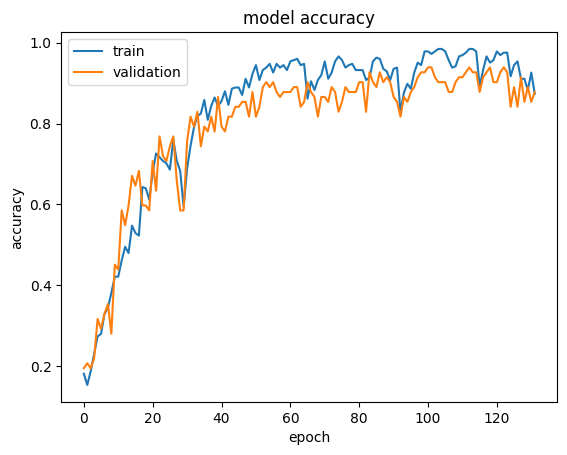

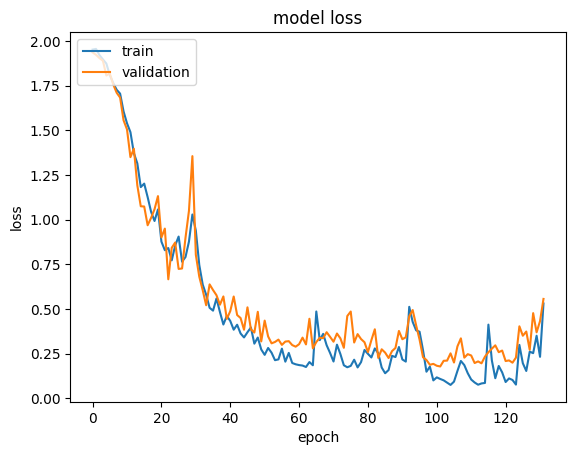

In [26]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
res =modelSBU.predict(X_test)

3/3 [==============================] - 2s 13ms/step


In [28]:
import numpy as np

def threshold_vector(vector, threshold=0.5):
    return np.where(vector >= threshold, 1, 0)

binary_vector = threshold_vector(res)
binary_vector

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0,

In [29]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
pred = []
test = []
for i in res:
  pred.append(np.argmax(i))
for i in y_test:
  test.append(np.argmax(i))

print
print(pred)

print(test)

[1, 0, 3, 0, 4, 6, 2, 1, 6, 4, 6, 3, 3, 3, 6, 4, 2, 5, 4, 6, 5, 3, 4, 0, 6, 5, 6, 3, 0, 1, 1, 0, 3, 5, 1, 5, 2, 5, 5, 2, 4, 1, 6, 6, 2, 3, 1, 6, 6, 6, 3, 6, 5, 4, 2, 2, 4, 5, 0, 6, 5, 3, 0, 2, 1, 4, 4, 1, 4, 3, 1, 4, 1, 0, 5, 4, 4, 5, 0, 4, 5, 6]
[1, 0, 0, 0, 4, 6, 2, 2, 6, 6, 6, 3, 3, 3, 6, 4, 2, 5, 4, 6, 5, 3, 4, 0, 6, 5, 6, 3, 0, 1, 1, 0, 3, 5, 1, 5, 2, 5, 5, 2, 4, 1, 6, 6, 2, 3, 1, 6, 6, 6, 3, 6, 5, 4, 2, 2, 4, 5, 0, 6, 5, 3, 0, 2, 2, 4, 4, 1, 5, 3, 1, 4, 1, 0, 5, 4, 4, 5, 0, 4, 5, 6]


In [30]:
from sklearn.metrics import classification_report

recall =classification_report(test, pred, target_names= actions)
print(recall)

                 precision    recall  f1-score   support

Alerta de Caída       1.00      0.90      0.95        10
         Normal       0.82      1.00      0.90         9
        Normal2       1.00      0.80      0.89        10
     Sentándose       0.91      1.00      0.95        10
   Levantándose       0.87      1.00      0.93        13
        Sentado       1.00      0.93      0.96        14
      Caminando       1.00      0.94      0.97        16

       accuracy                           0.94        82
      macro avg       0.94      0.94      0.94        82
   weighted avg       0.95      0.94      0.94        82



In [31]:
modelSBU.evaluate(X_test, y_test)

3/3 [==============================] - 0s 16ms/step - loss: 0.1789 - categorical_accuracy: 0.9390


[0.17888233065605164, 0.9390243887901306]

In [32]:
modelSBU.save('TrainedModel/modelSBU.h5')

C:\Users\quirozdj\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
def LSTM_PASL(action):
    input_shape = (X_train.shape[1], X_train.shape[2])
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = LSTM(256, return_sequences=True, activation='tanh')(input_layer)
    x = Dropout(0.2)(x)
    x = LSTM(128, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    output_layer = Dense(len(action), activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [34]:
modelLSTM_PASL = LSTM_PASL(actions)
modelLSTM_PASL.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 132)]         0         
                                                                 
 lstm_6 (LSTM)               (None, 30, 256)           398336    
                                                                 
 dropout_6 (Dropout)         (None, 30, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           197120    
                                                                 
 dropout_7 (Dropout)         (None, 30, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 2688

In [35]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)

# Create an optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [36]:
early_stopping_monitor = EarlyStopping(patience = 30,  restore_best_weights = True)

In [37]:
modelLSTM_PASL.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [38]:
history = modelLSTM_PASL.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/2000
6/6 [==============================] - 10s 466ms/step - loss: 1.9546 - categorical_accuracy: 0.1692 - val_loss: 1.8801 - val_categorical_accuracy: 0.2561
Epoch 2/2000
6/6 [==============================] - 1s 153ms/step - loss: 1.7272 - categorical_accuracy: 0.2554 - val_loss: 1.6288 - val_categorical_accuracy: 0.3537
Epoch 3/2000
6/6 [==============================] - 1s 156ms/step - loss: 1.4435 - categorical_accuracy: 0.4123 - val_loss: 1.6005 - val_categorical_accuracy: 0.3293
Epoch 4/2000
6/6 [==============================] - 1s 156ms/step - loss: 1.4369 - categorical_accuracy: 0.4000 - val_loss: 1.3527 - val_categorical_accuracy: 0.5000
Epoch 5/2000
6/6 [==============================] - 1s 153ms/step - loss: 1.2062 - categorical_accuracy: 0.5508 - val_loss: 1.1499 - val_categorical_accuracy: 0.5488
Epoch 6/2000
6/6 [==============================] - 1s 163ms/step - loss: 1.0896 - categorical_accuracy: 0.5723 - val_loss: 1.0240 - val_categorical_accuracy: 0.5854
Epo

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


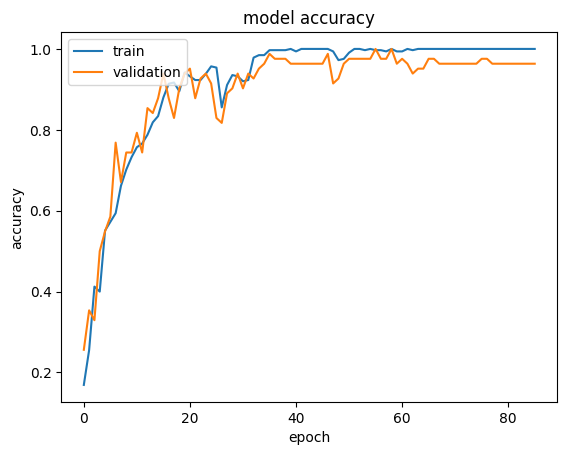

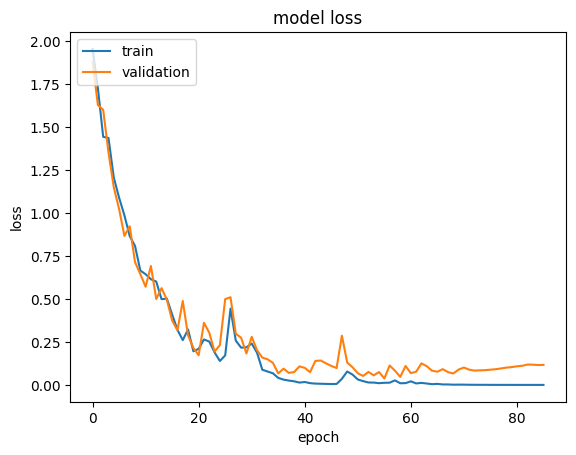

In [39]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
res =modelLSTM_PASL.predict(X_test)

3/3 [==============================] - 1s 34ms/step


In [41]:
import numpy as np

def threshold_vector(vector, threshold=0.5):
    return np.where(vector >= threshold, 1, 0)

binary_vector = threshold_vector(res)
binary_vector

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0,

In [44]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
pred = []
test = []
for i in res:
  pred.append(np.argmax(i))
for i in y_test:
  test.append(np.argmax(i))

print
print(pred)

print(test)

[1, 0, 0, 0, 4, 6, 2, 2, 6, 6, 6, 3, 3, 3, 6, 4, 2, 5, 4, 6, 5, 3, 4, 0, 6, 5, 6, 3, 0, 1, 1, 0, 3, 5, 1, 5, 2, 5, 5, 2, 4, 1, 6, 6, 2, 3, 1, 6, 6, 6, 3, 6, 5, 4, 2, 2, 4, 5, 0, 6, 5, 3, 0, 2, 2, 4, 4, 1, 5, 3, 1, 4, 1, 0, 5, 4, 4, 5, 0, 4, 5, 6]
[1, 0, 0, 0, 4, 6, 2, 2, 6, 6, 6, 3, 3, 3, 6, 4, 2, 5, 4, 6, 5, 3, 4, 0, 6, 5, 6, 3, 0, 1, 1, 0, 3, 5, 1, 5, 2, 5, 5, 2, 4, 1, 6, 6, 2, 3, 1, 6, 6, 6, 3, 6, 5, 4, 2, 2, 4, 5, 0, 6, 5, 3, 0, 2, 2, 4, 4, 1, 5, 3, 1, 4, 1, 0, 5, 4, 4, 5, 0, 4, 5, 6]


In [45]:
from sklearn.metrics import classification_report

recall =classification_report(test, pred, target_names= actions)
print(recall)

                 precision    recall  f1-score   support

Alerta de Caída       1.00      1.00      1.00        10
         Normal       1.00      1.00      1.00         9
        Normal2       1.00      1.00      1.00        10
     Sentándose       1.00      1.00      1.00        10
   Levantándose       1.00      1.00      1.00        13
        Sentado       1.00      1.00      1.00        14
      Caminando       1.00      1.00      1.00        16

       accuracy                           1.00        82
      macro avg       1.00      1.00      1.00        82
   weighted avg       1.00      1.00      1.00        82



In [48]:
modelLSTM_PASL.evaluate(X_test, y_test)

3/3 [==============================] - 0s 39ms/step - loss: 0.0378 - categorical_accuracy: 1.0000


[0.037792082875967026, 1.0]

In [50]:
modelLSTM_PASL.save('TrainedModel/modelLSTM_PASL.h5')